# Table of Contents

## 01. Importing Libraries and Dataframe

## 02. Wrangling Data

## 03. Line Chart of Data

## 04. Decomposition

## 05. Check for Stationarity

## 06. Autocorrelation

--------

# 01. Importing Libraries and Dataframe

In [1]:
# importing libraries

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# specifying folder shortcut

path= r'C:\Users\princess\Downloads\12-23 Gun Violence Analysis'

In [3]:
#importing cleaned dataset 

gv_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', '6.4_gun_violence_cleaned.csv'))

-------

# 02. Wrangling Data

In [4]:
gv_df.head()

,Unnamed: 0,Incident ID,Date,Year,Month,Weekday,State,City or County,Number Killed,Number Injured,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,0,4,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,1,460726,2013-01-01,2013,1,1,California,Hawthorne,1,3,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1,3,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,3,478925,2013-01-05,2013,1,5,Colorado,Aurora,4,0,...,NaN,NaN,0,0,4,4,3,1,3,1
4,4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,2,2,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1


In [5]:
#drop unnamed column 
gv_df = gv_df.drop(columns = ['Unnamed: 0'])

In [6]:
gv_df.head()

,Incident ID,Date,Year,Month,Weekday,State,City or County,Number Killed,Number Injured,Number of Guns Involved,...,Location Description,Notes,Child Participants 0-11,Teen Participants 12-17,Adult Participants 18+,Total Participants,Male Participants,Female Participants,Victim Count,Suspect Count
0,461105,2013-01-01,2013,1,1,Pennsylvania,Mckeesport,0,4,NaN,...,NaN,Julian Sims under investigation: Four Shot and...,0,0,5,4,3,1,4,1
1,460726,2013-01-01,2013,1,1,California,Hawthorne,1,3,NaN,...,NaN,Four Shot; One Killed; Unidentified shooter in...,0,0,4,1,1,0,4,1
2,478855,2013-01-01,2013,1,1,Ohio,Lorain,1,3,2.0,...,Cotton Club,NaN,0,0,5,5,5,0,3,2
3,478925,2013-01-05,2013,1,5,Colorado,Aurora,4,0,NaN,...,NaN,NaN,0,0,4,4,3,1,3,1
4,478959,2013-01-07,2013,1,0,North Carolina,Greensboro,2,2,2.0,...,NaN,Two firearms recovered. (Attempted) murder sui...,0,1,3,4,2,2,3,1


In [7]:
# Check the column names 

gv_df.columns

Index(['Incident ID', 'Date', 'Year', 'Month', 'Weekday', 'State',
       'City or County', 'Number Killed', 'Number Injured',
       'Number of Guns Involved', 'Incident Characteristics',
       'Congressional District', 'Latitude', 'Longitude', 'Location Combined',
       'Location Description', 'Notes', 'Child Participants 0-11',
       'Teen Participants 12-17', 'Adult Participants 18+',
       'Total Participants', 'Male Participants', 'Female Participants',
       'Victim Count', 'Suspect Count'],
      dtype='object')

In [8]:
gv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Incident ID               239677 non-null  int64  
 1   Date                      239677 non-null  object 
 2   Year                      239677 non-null  int64  
 3   Month                     239677 non-null  int64  
 4   Weekday                   239677 non-null  int64  
 5   State                     239677 non-null  object 
 6   City or County            239677 non-null  object 
 7   Number Killed             239677 non-null  int64  
 8   Number Injured            239677 non-null  int64  
 9   Number of Guns Involved   140226 non-null  float64
 10  Incident Characteristics  239351 non-null  object 
 11  Congressional District    227733 non-null  float64
 12  Latitude                  231754 non-null  float64
 13  Longitude                 231754 non-null  f

-------

# 03. Line Chart of Data

In [9]:
#converting the data to datetime format 
gv_df['Date'] = pd.to_datetime(gv_df['Date'])

In [10]:
# setting the data as the index

gv_df.set_index('Date', inplace=True)

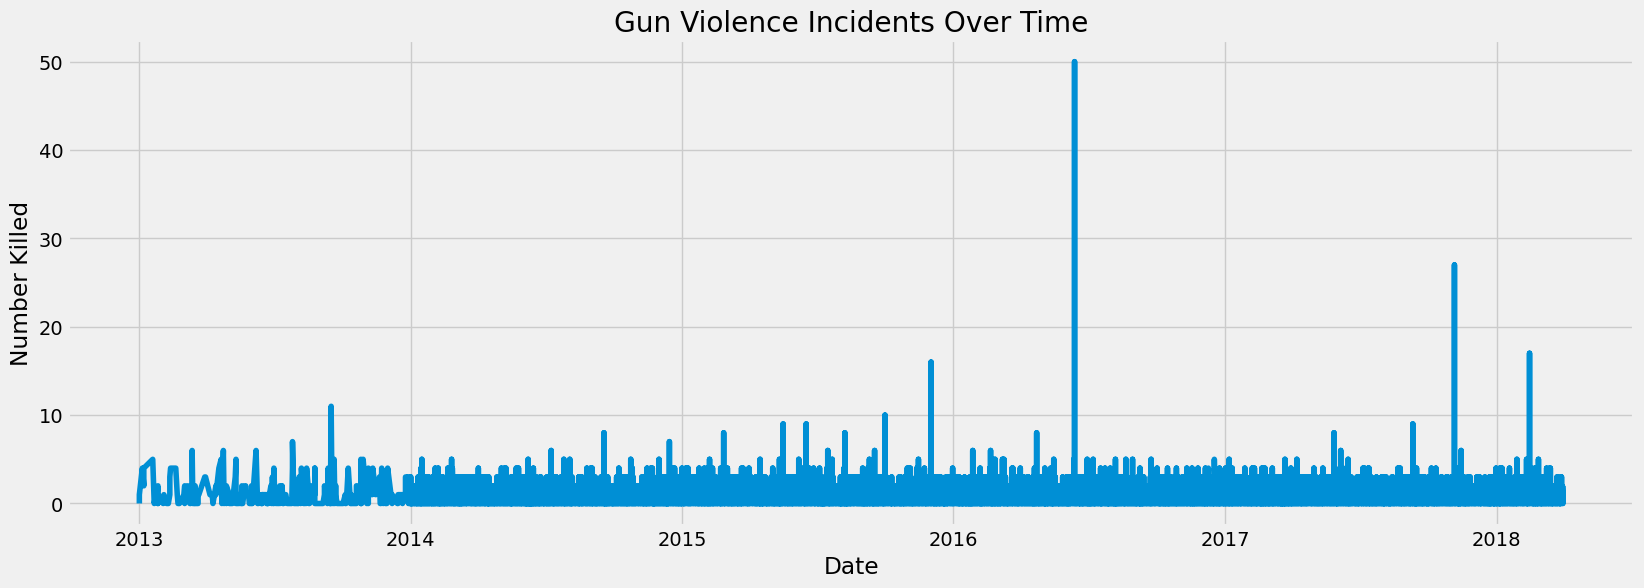

In [11]:
# Plot the number killed and year data

plt.figure(figsize=(18, 6))
plt.plot(gv_df['Number Killed'])
plt.title('Gun Violence Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number Killed')
plt.show()

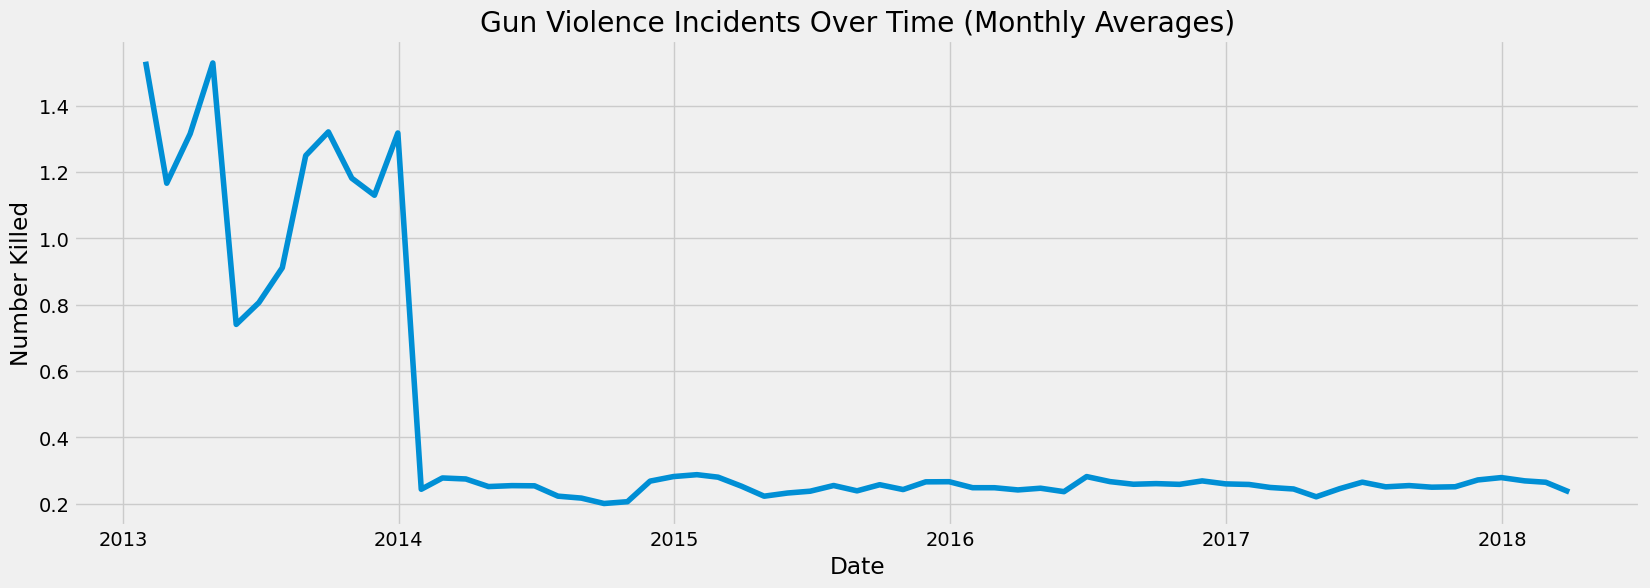

In [12]:
# it looks very condensed so i will try to make the line more visible with some adjustments 

# exclude the non-numeric values from downsampling
numeric_columns = gv_df.select_dtypes(include=[int, float]).columns

# Downsample to monthly averages for numeric columns
monthly_avg = gv_df[numeric_columns].resample('M').mean()

# Plotting
plt.figure(figsize=(18, 6))
plt.plot(monthly_avg['Number Killed'])
plt.title('Gun Violence Incidents Over Time (Monthly Averages)')
plt.xlabel('Date')
plt.ylabel('Number Killed')
plt.show()

-------

# 04. Decomposition

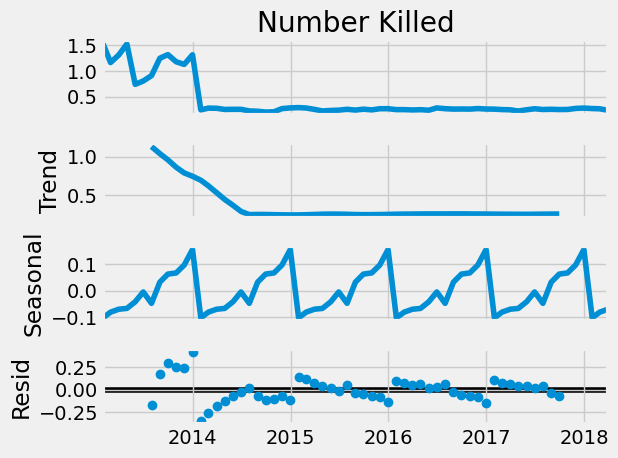

In [13]:
# Decompose the time series using an additive model

result = sm.tsa.seasonal_decompose(monthly_avg['Number Killed'], model='additive')
result.plot()
plt.show()

#### The trend line started high but once the data reached mid-2014, the line decreased and became constant. The seasonal plot shows that there is similar patterns seasonally at the same time per year (or that's what it appears to be). The residual data shows that the all looks similar after 2015. Before 2015, the noise was more scattered.

-------

# 05. Check for Stationarity

In [14]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(gv_df['Number Killed'])

Dickey-Fuller Stationarity test:
Test Statistic                    -47.537863
p-value                             0.000000
Number of Lags Used                82.000000
Number of Observations Used    239594.000000
Critical Value (1%)                -3.430377
Critical Value (5%)                -2.861552
Critical Value (10%)               -2.566776
dtype: float64


#### The test statistic is significantly lower than the critical value, indicating strong evidence against the null hypothesis. Additionally, the p-value is very close to zero (0.000000). This provides further evidence against the null hypothesis. A small p-value indicates that the data is most likely stationary. 

-------

# 06. Autocorrelation

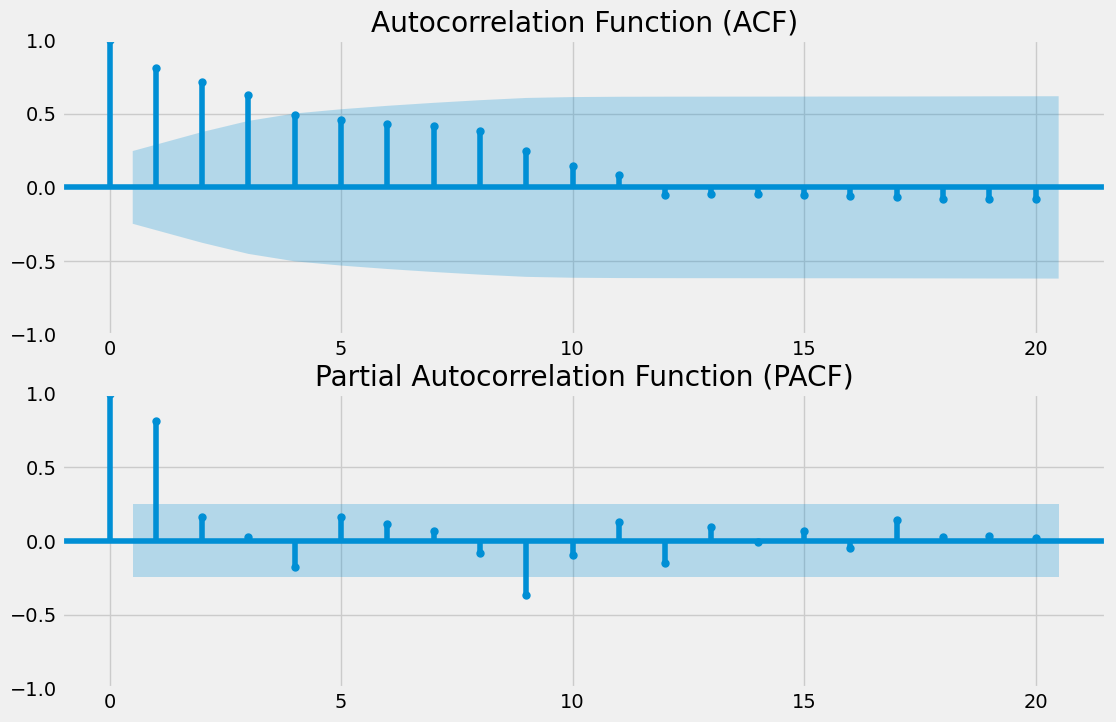

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # importing the autocorrelation and partial correlation plots

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(monthly_avg['Number Killed'].dropna(), lags=20, ax=ax1)
ax1.set_title('Autocorrelation Function (ACF)')

# PACF plot
plot_pacf(monthly_avg['Number Killed'].dropna(), lags=20, ax=ax2)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

#### In my ACF plot, I have only four lines that extend beyond the confidence interval. In my PACF plot I have two above it and one below it. Therefore, the data appears to be stationary, as supported by the Dickey-Fuller Statioary test. 